#### Set Up

In [33]:
## imports and dependencies

# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# accuracy metrics
from sklearn.metrics import accuracy_score

#### Data

In [34]:
# load data
df_train = pd.read_csv("train.csv") 
df_test  = pd.read_csv("test.csv")

In [35]:
# training set sample 
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# test set sample 
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Pre Processing

In [37]:
# parameters and target
x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [38]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Baseline Models

##### Baseline 1 - All Survive

In [40]:
df_all_survive = df_train.copy()

df_all_survive['Predicted Survival'] = 1

##### Baseline 2 - None Survive

In [41]:
df_none_survive = df_train.copy()

df_none_survive['Predicted Survival'] = 0

##### Baseline 3 - Women and Children Survive

In [42]:
df__women_children = df_train.copy()

df__women_children['Predicted Survival'] = 0

df__women_children.loc[df__women_children['Sex'] == 'female', 'Predicted Survival'] = 1
df__women_children.loc[df__women_children['Age'] < 18, 'Predicted Survival'] = 1

##### Baseline 4 - First Class Survive

In [43]:
df_first_class = df_train.copy()

df_first_class['Predicted Survival'] = 0

df_first_class.loc[df_first_class['Pclass'] == 1, 'Predicted Survival'] = 1

#### Testing

In [44]:
baseline_all_survive_predictions = df_all_survive['Predicted Survival']
baseline_none_survive_predictions = df_none_survive['Predicted Survival']
baseline_women_children_predictions = df__women_children['Predicted Survival']
baseline_first_class_predictions = df_first_class['Predicted Survival']

In [45]:
baseline_all_survive_accuracy = accuracy_score(y, baseline_all_survive_predictions)
baseline_none_survive_accuracy = accuracy_score(y, baseline_none_survive_predictions)
baseline_women_children_accuracy = accuracy_score(y, baseline_women_children_predictions)
baseline_first_class_accuracy = accuracy_score(y, baseline_first_class_predictions)

In [46]:
print(f"Baseline Accuracy (All Survive): {baseline_all_survive_accuracy*100:.2f}%")
print(f"Baseline Accuracy (None Survive): {baseline_none_survive_accuracy*100:.2f}%")
print(f"Baseline Accuracy (Women and Children Survive): {baseline_women_children_accuracy*100:.2f}%")
print(f"Baseline Accuracy (First Class Survive): {baseline_first_class_accuracy*100:.2f}%")

Baseline Accuracy (All Survive): 38.38%
Baseline Accuracy (None Survive): 61.62%
Baseline Accuracy (Women and Children Survive): 77.33%
Baseline Accuracy (First Class Survive): 67.90%


In [47]:
baseline_models = ["All Survive", "None Survive", "Women and Children Survive", "First Class Survive"]
baseline_models_accuracy = [baseline_all_survive_accuracy, baseline_none_survive_accuracy, baseline_women_children_accuracy, baseline_first_class_accuracy]

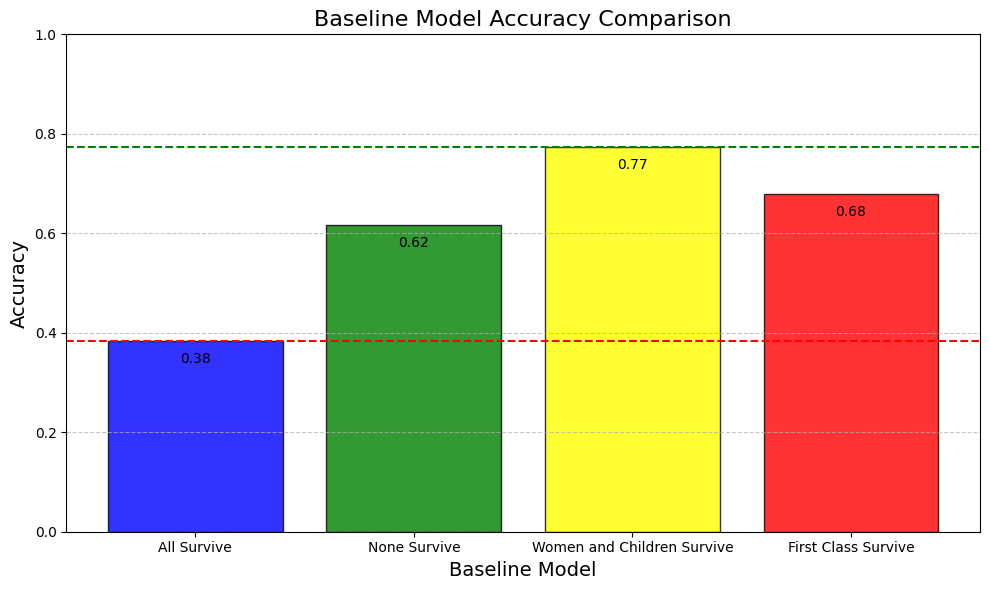

In [52]:
plt.figure(figsize=(10, 6))
bars = plt.bar(baseline_models, baseline_models_accuracy, color=["blue", "green", "yellow", "red"], alpha=0.8, edgecolor="black")

# Add values on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 0.05,
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.axhline(y=min(baseline_models_accuracy), ls="--", color="r")
plt.axhline(y=max(baseline_models_accuracy), ls="--", color="g")

# Add labels and title
plt.title("Baseline Model Accuracy Comparison", fontsize=16)
plt.xlabel("Baseline Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()